# load useful libraries

In [1]:
import pandas as pd
import scanpy as sc

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
# known good versions:
# scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


# read data

In [2]:
datadir = '/home/boyko/data/cancer-io-challenge'
adata = sc.read_h5ad(f"{datadir}/sc_training.h5ad")
adata
# known result:
# AnnData object with n_obs × n_vars = 28697 × 15077
#    obs: 'gRNA_maxID', 'state', 'condition', 'lane', 
# layers: 'rawcounts'

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [3]:
print(adata.obs.shape)
adata.obs.index.name = 'cell'
adata.obs

(28697, 4)


,gRNA_maxID,state,condition,lane
cell,,,,
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4


In [ ]:
print(sorted(set(adata.obs.condition)))

['Arid4b', 'Arid5b', 'Atf2', 'Batf', 'Crem', 'Ctnnb1', 'Dkk3', 'Dvl1', 'Dvl2', 'Dvl3', 'Eef2', 'Egr1', 'Elf1', 'Eomes', 'Ep300', 'Ezh2', 'Foxm1', 'Foxo1', 'Foxp1', 'Fzd1', 'Fzd3', 'Fzd6', 'Gsk3b', 'Hif1a', 'Hmgb1', 'Hmgb2', 'Id2', 'Id3', 'Ikzf3', 'Il12rb1', 'Il12rb2', 'Irf2', 'Irf9', 'Klf2', 'Ldhb', 'Lef1', 'Litaf', 'Lrp1', 'Myb', 'Nr3c1', 'Nr4a1', 'Nr4a2', 'Nr4a3', 'Oxnad1', 'P2rx7', 'Prdm1', 'Rad21', 'Rela', 'Rps6', 'Runx2', 'Runx3', 'Satb1', 'Sox4', 'Sp100', 'Sp140', 'Stat4', 'Sub1', 'Tbx21', 'Tcf3', 'Tcf7', 'Tox', 'Tox2', 'Tpt1', 'Unperturbed', 'Yy1', 'Zeb2', 'Zfp292']


In [94]:
goi = ['Batf','Ctla4','Ctnnb1','Eomes','Ep300','Ezh2','Foxm1','Gzma','Il12rb1','Id2','Id3','Ifng','Irf2','Irf9','Klf2','Myb','Oct4','Pdcd1','Prdm1','Prf1','Runx2','Sox4','Stat3','Stat4','Tcf3','Tcf7','Tox','Tox2','Unperturbed']
csc = adata.obs.query(f"condition in {goi}")
csc = csc.groupby(['condition','gRNA_maxID','state']).count()
csc = csc.query('lane > 0').sort_index()
csc = csc.unstack().fillna(0)
csc.columns = csc.columns.get_level_values('state').to_list()
csc.sort_index(inplace=True)
csc

cycling  effector  other  progenitor  \
condition   gRNA_maxID                                                   
Batf        Batf-2                    0.0       0.0    1.0         1.0   
            Batf-3                    0.0       0.0    0.0         3.0   
Ctnnb1      Ctnnb1-1                  3.0       6.0    0.0         6.0   
            Ctnnb1-2                  0.0       1.0    0.0         2.0   
            Ctnnb1-3                  2.0       2.0    0.0        15.0   
...                                   ...       ...    ...         ...   
Unperturbed ONE-NON-GENE-SITE-11     25.0      14.0    0.0         6.0   
            ONE-NON-GENE-SITE-12      2.0       1.0    1.0         6.0   
            ONE-NON-GENE-SITE-13      1.0       0.0    0.0         2.0   
            ONE-NON-GENE-SITE-14      0.0       3.0    0.0         5.0   
            ONE-NON-GENE-SITE-15      1.0       0.0    0.0         6.0   

                                  terminal exhausted  
condition   gRNA_maxID                                
Batf        Batf-2                               1.0  
            Batf-3                               0.0  
Ctnnb1      Ctnnb1-1                             1.0  
            Ctnnb1-2                             0.0  
            Ctnnb1-3                             5.0  
...                                              ...  
Unperturbed ONE-NON-GENE-SITE-11                12.0  
            ONE-NON-GENE-SITE-12                 2.0  
            ONE-NON-GENE-SITE-13                 2.0  
            ONE-NON-GENE-SITE-14                 1.0  
            ONE-NON-GENE-SITE-15                 0.0  

[90 rows x 5 columns]

In [99]:
csf = csc.copy()
conds = csc.index.get_level_values('condition').to_list()
num_unperturbed = sum(['Unperturbed' == _ for _ in conds])
grnas = csc.index.get_level_values('gRNA_maxID').to_list()
num_nosite = sum([_.startswith('NO-SITE') for _ in grnas])
num_nongene = sum(['NON-GENE' in _ for _ in grnas])
conds = conds[:-num_unperturbed] + ['Z-NOSITE'] * num_nosite + ['Z1-NONGENE'] * num_nongene
csf.index = pd.MultiIndex.from_arrays([conds,grnas], names=['condition','gRNA_maxID'])
csf.sort_index(inplace=True)
csf.reset_index().iloc[:-num_unperturbed,:]

,condition,gRNA_maxID,cycling,effector,other,progenitor,terminal exhausted
0,Batf,Batf-2,0.0,0.0,1.0,1.0,1.0
1,Batf,Batf-3,0.0,0.0,0.0,3.0,0.0
2,Ctnnb1,Ctnnb1-1,3.0,6.0,0.0,6.0,1.0
3,Ctnnb1,Ctnnb1-2,0.0,1.0,0.0,2.0,0.0
4,Ctnnb1,Ctnnb1-3,2.0,2.0,0.0,15.0,5.0
5,Eomes,Eomes-1,0.0,0.0,0.0,3.0,0.0
6,Eomes,Eomes-2,1.0,1.0,0.0,3.0,0.0
7,Eomes,Eomes-3,2.0,4.0,0.0,1.0,1.0
8,Ep300,Ep300-1,0.0,0.0,0.0,6.0,0.0
9,Ep300,Ep300-2,0.0,0.0,0.0,15.0,0.0


In [78]:
cond_csf = csf.reset_index().groupby('condition').sum()
cond_csf.div(cond_csf.sum(axis=1), axis=0)

,cycling,effector,other,progenitor,terminal exhausted
condition,,,,,
Batf,0.000000,0.000000,0.166667,0.666667,0.166667
Ctnnb1,0.116279,0.209302,0.000000,0.534884,0.139535
Eomes,0.187500,0.312500,0.000000,0.437500,0.062500
Ep300,0.000000,0.000000,0.000000,1.000000,0.000000
Ezh2,0.269231,0.346154,0.000000,0.230769,0.153846
Foxm1,0.142857,0.071429,0.000000,0.642857,0.142857
Id2,0.290598,0.205128,0.017094,0.273504,0.213675
Id3,0.304348,0.086957,0.000000,0.391304,0.217391
Il12rb1,0.450639,0.186992,0.013937,0.032520,0.315912


In [79]:
target_csf = csf.reset_index().groupby('gRNA_maxID').sum()
target_csf.div(target_csf.sum(axis=1), axis=0)

,cycling,effector,other,progenitor,terminal exhausted
gRNA_maxID,,,,,
Batf-2,0.000000,0.000000,0.333333,0.333333,0.333333
Batf-3,0.000000,0.000000,0.000000,1.000000,0.000000
Ctnnb1-1,0.187500,0.375000,0.000000,0.375000,0.062500
Ctnnb1-2,0.000000,0.333333,0.000000,0.666667,0.000000
Ctnnb1-3,0.083333,0.083333,0.000000,0.625000,0.208333
...,...,...,...,...,...
Tox-2,0.125000,0.250000,0.000000,0.500000,0.125000
Tox-3,0.125000,0.625000,0.000000,0.250000,0.000000
Tox2-1,0.480000,0.080000,0.000000,0.220000,0.220000


# adata.X stores the stadard-normalized data, but you can also reconstruct it using adata.layers['rawcounts']

In [53]:
# make a copy of normalized logcounts
adata.layers['normalized_logcounts'] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts', 'normalized_logcounts'

In [8]:
# standard normalization
adata.X = adata.layers['rawcounts'].copy()

sc.pp.normalize_total(adata, target_sum=5e3)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:01)


# visualize cell state clusters on umap

In [9]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata, min_dist=0.3)
# known result:
# computing PCA | with n_comps=50 | finished (0:00:32)
# computing neighbors using 'X_pca' | with n_pcs = 50 | finished: added to `.uns['neighbors']`
#    `.obsp['distances']`, distances for each pair of neighbors
#    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
# computing UMAP | finished: added
#    'X_umap', UMAP coordinates (adata.obsm) (0:00:23) 

computing PCA
    with n_comps=50
    finished (0:00:43)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


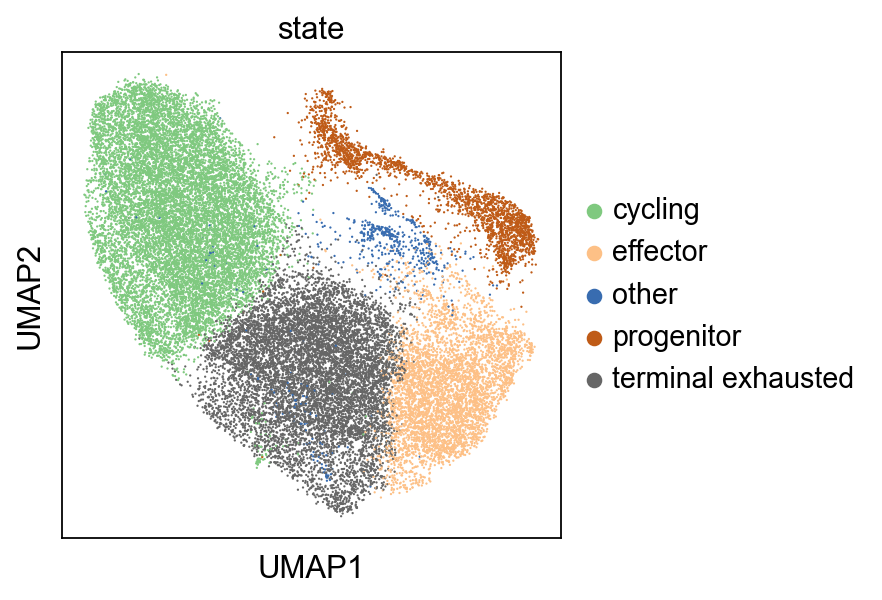

In [7]:
sc.pl.umap(adata, color=['state'], palette='Accent', legend_loc='right margin')
# known result

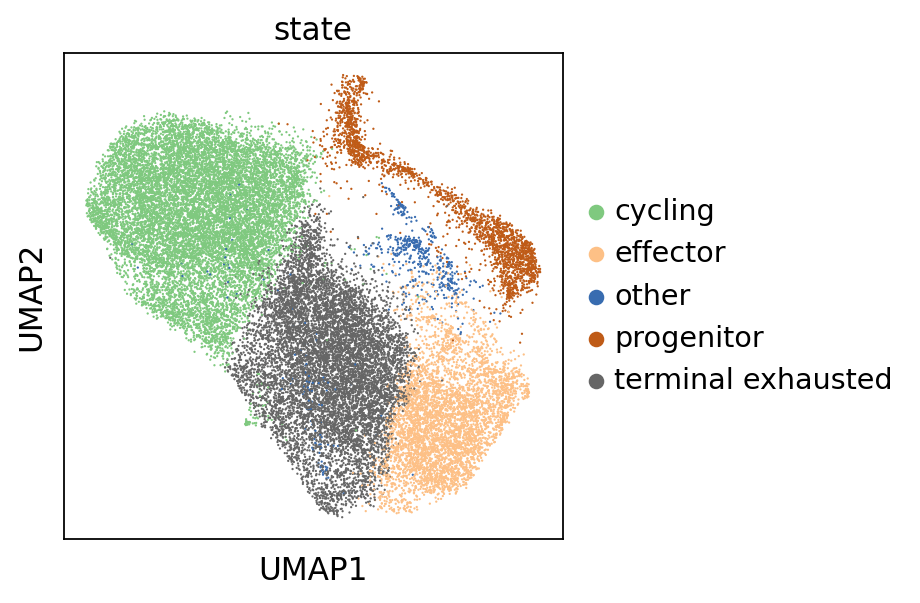

In [10]:
sc.pl.umap(adata, color=['state'], palette='Accent', legend_loc='right margin')
# current result